<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GDB-Debug" data-toc-modified-id="GDB-Debug-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GDB Debug</a></span><ul class="toc-item"><li><span><a href="#传统pdb" data-toc-modified-id="传统pdb-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>传统pdb</a></span></li><li><span><a href="#Jupyter-ipdb" data-toc-modified-id="Jupyter-ipdb-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Jupyter ipdb</a></span></li><li><span><a href="#SET-Jupter-outputLog" data-toc-modified-id="SET-Jupter-outputLog-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>SET Jupter outputLog</a></span></li></ul></li><li><span><a href="#Matplotlab-realtime-interactive" data-toc-modified-id="Matplotlab-realtime-interactive-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matplotlab realtime interactive</a></span></li><li><span><a href="#设置中文" data-toc-modified-id="设置中文-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>设置中文</a></span><ul class="toc-item"><li><span><a href="#系统内置类型" data-toc-modified-id="系统内置类型-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>系统内置类型</a></span></li><li><span><a href="#设置rc" data-toc-modified-id="设置rc-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>设置rc</a></span></li></ul></li><li><span><a href="#Logger-to-Console-not-webpage" data-toc-modified-id="Logger-to-Console-not-webpage-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logger to Console not webpage</a></span><ul class="toc-item"><li><span><a href="#check-Logger-stderr" data-toc-modified-id="check-Logger-stderr-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>check Logger stderr</a></span></li><li><span><a href="#Init-Logger-logging.StreamHandler-and-Format-out" data-toc-modified-id="Init-Logger-logging.StreamHandler-and-Format-out-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Init Logger logging.StreamHandler and Format out</a></span></li><li><span><a href="#Loger-to-Console-fd" data-toc-modified-id="Loger-to-Console-fd-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Loger to Console fd</a></span></li><li><span><a href="#Init-Tdd-and-Logger-To-webpage" data-toc-modified-id="Init-Tdd-and-Logger-To-webpage-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Init Tdd and Logger To webpage</a></span></li><li><span><a href="#Ipython-Display-Notebook-cell" data-toc-modified-id="Ipython-Display-Notebook-cell-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Ipython Display Notebook cell</a></span></li></ul></li><li><span><a href="#normalize_code" data-toc-modified-id="normalize_code-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>normalize_code</a></span><ul class="toc-item"><li><span><a href="#normalize_code" data-toc-modified-id="normalize_code-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>normalize_code</a></span></li></ul></li></ul></div>

# GDB Debug

## 传统pdb

In [ ]:
import pdb 
pdb.set_trace() 
print 'new:'

## Jupyter ipdb

In [ ]:
from IPython.core.debugger import Tracer
Tracer()() #this one triggers the debugger
print 'new:

In [ ]:
import IPython.core.debugger
dbg = IPython.core.debugger.Pdb()
dbg.set_trace()
print 'new:'

In [ ]:
import sys
old_excepthook = sys.excepthook
def new_excepthook(exception_type, exception_value, traceback):
    if hasattr(exception_type, 'on_raise'):
        exception_type.on_raise(exception_value)
    old_excepthook(exception_type, exception_value, traceback)
sys.excepthook = new_excepthook
import pdb;pdb.set_trace()
print 'new:',sys.excepthook

--Return--
> <ipython-input-1-f48fd496c6b7>(8)<module>()->None
-> import pdb;pdb.set_trace()
(Pdb) n
> /Users/Johnson/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py(2884)run_code()
-> sys.excepthook = old_excepthook


## SET Jupter outputLog

In [ ]:
# set up logging #####################################
import sys,logging,logging.handlers,os.path
logfile = os.path.splitext(os.path.basename(sys.argv[0]))[0]+".log"
l = logging.getLogger()
l.setLevel(logging.DEBUG)
f = logging.Formatter('%(asctime)s %(process)d:%(thread)d %(name)s %(levelname)-8s %(message)s')
h=logging.StreamHandler(sys.stdout)
h.setLevel(logging.NOTSET)
h.setFormatter(f)
l.addHandler(h)
h=logging.handlers.RotatingFileHandler(logfile,maxBytes=1024**2,backupCount=1)
h.setLevel(logging.NOTSET)
h.setFormatter(f)
l.addHandler(h)
del h,f
#hook to log unhandled exceptions
def excepthook(type,value,traceback):
    logging.error("Unhandled exception occured",exc_info=(type,value,traceback))
    #Don't need another copy of traceback on stderr
    if old_excepthook!=sys.__excepthook__:
        old_excepthook(type,value,traceback)
old_excepthook = sys.excepthook
sys.excepthook = excepthook
del excepthook,logfile
# ####################################################

# Matplotlab realtime interactive

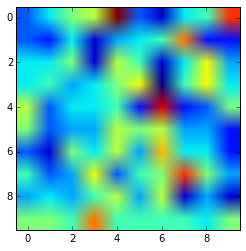

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from time import sleep

from ipywidgets import FloatProgress
from IPython.display import display, clear_output

siz = 10
dat = np.zeros((siz, siz))

fig = plt.figure()
axe = fig.add_subplot(111)
img = axe.imshow(dat)

num = 1000

prgBar = FloatProgress(min=0, max=num-1)
display(prgBar)

for i in range(num):
    clear_output(wait = True)
    prgBar.value = i
    pos = (randint(0, siz-1), randint(0, siz-1))
    dat[pos] += 1
    img.set_data(dat)
    img.autoscale()
    display(fig)

# 设置中文

## 系统内置类型

In [5]:
import pandas as pd
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts()
l = []
for f in fonts:
    try:
        font =matplotlib.font_manager.FontProperties(fname=f)
        #print(font.get_family())
        l.append((f, font.get_name(), font.get_family(), font.get_weight()))
    except:
        pass
df = pd.DataFrame(l, columns=['path', 'name', 'family', 'weight'])

## 设置rc

In [7]:
# import matplotlib as mpl
# mpl.rc('font', family='STHeiti') 
# 设置内部编码reload(sys)
# sys.setdefaultencoding('utf8')
#中文字体显示  
import matplotlib.pyplot as plt  
plt.rc('font', family='SimHei', size=13)

#Tips

In [2]:
import numpy as np
import pylab as pl
%matplotlib inline

# Logger to Console not webpage

## check Logger stderr

In [5]:
import logging
import sys
stdout = sys.stdout
print 'sys.stderr:', sys.stderr
print 'sys.stdout:', sys.stdout

# Get root logger (all other loggers will be derived from this logger's
# properties)
logger = logging.getLogger()
logger.warning("I will output to terminal")  # No output in notebook, goes to terminal

# assuming only a single handler has been setup (seems 
# to be default in notebook), set that handler to go to stdout.
if len(logger.handlers) > 0:
    for ix in logger.handlers:
        print ("checkhandlers:%s std:%s"%(ix.stream,sys.stdout))
    sys.stdout = logger.handlers[0].stream
    sys.stderr = logger.handlers[0].stream
logger.setLevel(logging.ERROR)
logger.warning("FOO")  # Prints: WARNING:root:FOO
# Other loggers derive from the root logger, so you can also do:


sys.stderr: <ipykernel.iostream.OutStream object at 0x1066470d0>
sys.stdout: <ipykernel.iostream.OutStream object at 0x106647090>
checkhandlers:<ipykernel.iostream.OutStream object at 0x1066470d0> std:<ipykernel.iostream.OutStream object at 0x106647090>


## Init Logger logging.StreamHandler and Format out

In [2]:
import logging
import sys

# logging.StreamHandler(stream=sys.stdout).addHandler(logging.NullHandler())
# Create logger
logger = logging.getLogger()
if len(logger.handlers) > 0:
    for ix in logger.handlers:
        print ("handlers:%s std:%s"%(ix.stream,sys.stdout))
    print "handlers:%s"%(logger.handlers)
#     logger.handlers.pop()
else:
    print "not handlers"
#     logger.propagate = False
logger.setLevel(logging.ERROR)
# Create STDERR handler
handler = logging.StreamHandler()
# ch.setLevel(logging.DEBUG)

# Create formatter and add it to the handler
formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Set STDERR handler as the only handler 
logger.handlers = [handler]
logger.info('Init Loger')
logger.info('stderr:%s'%(sys.stderr))

not handlers


## Loger to Console fd

In [3]:
import os
root = logging.getLogger()
# root.addHandler(logging.StreamHandler(os.fdopen(1, "w")))
#now, logging.debug log into the console
print root.handlers,sys.stdout


[<logging.StreamHandler object at 0x106922910>] <ipykernel.iostream.OutStream object at 0x106647090>


## Init Tdd and Logger To webpage

In [6]:
import sys,logging
stdout = sys.stdout
sys.path.append('../')
import JSONData.tdx_data_Day as tdd
sys.stdout = stdout
#Delete Jupyter notebook root logger handler
mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print ("handlers:%s std:%s"%(ix.stream,sys.stdout))
else:
    print "nb not handlers"
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
print "nb:",sys.stderr
#Create logger as usual


AttributeError: 'OutStream' object has no attribute 'setFormatter'

## Ipython Display Notebook cell

In [2]:
from IPython.display import display
df = tdd.get_tdx_Exp_day_to_df('999999',dl=2)
print df[:1]
# display(df)

In [12]:
from IPython.display import clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
# ‘all’, ‘last’, ‘last_expr’ or ‘none’
# 'last_expr_or_assign'
# InteractiveShell.ast_node_interactivity = "all"
# clear_output(wait=True)
# import sys
# stdout = sys.stdout
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdout = stdout
for i in range(5):
#     clear_output()
    print("Hello World!：%s"%(i))

Hello World!：0
Hello World!：1
Hello World!：2
Hello World!：3
Hello World!：4


In [ ]:
from IPython.core.magics.namespace import NamespaceMagics
class VariableInspectorWindow(object):
    instance = None
    
    def __init__(self, ipython):
        """Public constructor."""
        if VariableInspectorWindow.instance is not None:
            raise Exception("""Only one instance of the Variable Inspector can exist at a 
                time.  Call close() on the active instance before creating a new instance.
                If you have lost the handle to the active instance, you can re-obtain it
                via `VariableInspectorWindow.instance`.""")
        
        VariableInspectorWindow.instance = self
        self.closed = False
        self.namespace = NamespaceMagics()
        self.namespace.shell = ipython.kernel.shell
        
        self._box = widgets.Box()
        self._box.layout.overflow_y = 'scroll'
        self._table = widgets.HTML(value = 'Not hooked')
        self._box.children = [self._table]
        
        self._ipython = ipython
        self._ipython.events.register('post_run_cell', self._fill)
        
    def close(self):
        """Close and remove hooks."""
        if not self.closed:
            self._ipython.events.unregister('post_run_cell', self._fill)
            self._box.close()
            self.closed = True
            VariableInspectorWindow.instance = None

    def _fill(self):
        """Fill self with variable information."""
        values = self.namespace.who_ls()
        self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon"><table><thead><tr><th>Name</th><th>Type</th><th>Value</th></tr></thead><tr><td>' + \
            '</td></tr><tr><td>'.join(['{0}</td><td>{1}</td><td>{2}'.format(v, type(eval(v)).__name__, str(eval(v))) for v in values]) + \
            '</td></tr></table></div>'

    def _ipython_display_(self):
        """Called when display() or pyout is used to display the Variable 
        Inspector."""
        self._box._ipython_display_()

# normalize_code

## normalize_code

In [ ]:
# 作者：阿财
# 链接：https://zhuanlan.zhihu.com/p/260369082
# 来源：知乎
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

class EXCHANGE(_const):
    XSHG = 'XSHG'
    SSE = 'XSHG'
    SH = 'XSHG'
    XSHE = 'XSHE'
    SZ = 'XSHE'
    SZE = 'XSHE'

def normalize_code(symbol, pre_close=None):
    """
    归一化证券代码

    :param code 如000001
    :return 证券代码的全称 如000001.XSHE
    """
    if (not isinstance(symbol, str)):
        return symbol

    if (symbol.startswith('sz') and (len(symbol) == 8)):
        ret_normalize_code = '{}.{}'.format(symbol[2:8], EXCHANGE.SZ)
    elif (symbol.startswith('sh') and (len(symbol) == 8)):
        ret_normalize_code = '{}.{}'.format(symbol[2:8], EXCHANGE.SH)
    elif (symbol.startswith('00') and (len(symbol) == 6)):
        if ((pre_close is not None) and (pre_close > 2000)):
            # 推断是上证指数
            ret_normalize_code = '{}.{}'.format(symbol, EXCHANGE.SH)
        else:
            ret_normalize_code = '{}.{}'.format(symbol, EXCHANGE.SZ)
    elif ((symbol.startswith('399') or symbol.startswith('159') or \
        symbol.startswith('150')) and (len(symbol) == 6)):
        ret_normalize_code = '{}.{}'.format(symbol, EXCHANGE.SH)
    elif ((len(symbol) == 6) and (symbol.startswith('399') or \
        symbol.startswith('159') or symbol.startswith('150') or \
        symbol.startswith('16') or symbol.startswith('184801') or \
        symbol.startswith('201872'))):
        ret_normalize_code = '{}.{}'.format(symbol, EXCHANGE.SZ)
    elif ((len(symbol) == 6) and (symbol.startswith('50') or \
        symbol.startswith('51') or symbol.startswith('60') or \
        symbol.startswith('688') or symbol.startswith('900') or \
        (symbol == '751038'))):
        ret_normalize_code = '{}.{}'.format(symbol, EXCHANGE.SH)
    elif ((len(symbol) == 6) and (symbol[:3] in ['000', '001', '002', 
                                                 '200', '300'])):
        ret_normalize_code = '{}.{}'.format(symbol, EXCHANGE.SZ)
    else:
        print(symbol)
        ret_normalize_code = symbol

    return ret_normalize_code